In [19]:
from citipy import citipy as cp
import random
import pyowm
import numpy as np
from  urllib import request as urllib_request
import datetime
import json 
import matplotlib.pyplot as plt
from math import ceil as ceiling
import csv
import os
import pandas as pd
import requests as req
from scipy.stats.stats import pearsonr
import time
API="0b96cdf195c71f1105e53f361f7e2b27"
owm = pyowm.OWM(API)
url="http://api.openweathermap.org/data/2.5/weather?q="
units="&units=imperial"

In [52]:
cities = []
 
while len(cities) <= 1500:
    latitude = random.randint(-90.00,90.00)
    longitude = random.randint(-180.00, 180.00)
    city = cp.nearest_city(latitude, longitude)
    if city not in cities:
        cities.append({
            'city code' : city,
            'city': city.city_name,
            'country': city.country_code,
            'latitude': latitude,
            'longitude': longitude,
        })
    else:
        continue
            
print(cities)

[{'city code': <citipy.citipy.City object at 0x00000246CDD59128>, 'city': 'khatanga', 'country': 'ru', 'latitude': 73, 'longitude': 102}, {'city code': <citipy.citipy.City object at 0x00000246CD7D48D0>, 'city': 'mataura', 'country': 'pf', 'latitude': -29, 'longitude': -143}, {'city code': <citipy.citipy.City object at 0x00000246CDF4BDA0>, 'city': 'barentsburg', 'country': 'sj', 'latitude': 90, 'longitude': 4}, {'city code': <citipy.citipy.City object at 0x00000246CDF3D780>, 'city': 'jamestown', 'country': 'sh', 'latitude': -6, 'longitude': -3}, {'city code': <citipy.citipy.City object at 0x00000246CC8110B8>, 'city': 'saint george', 'country': 'bm', 'latitude': 29, 'longitude': -60}, {'city code': <citipy.citipy.City object at 0x00000246CDF3D780>, 'city': 'jamestown', 'country': 'sh', 'latitude': -44, 'longitude': -14}, {'city code': <citipy.citipy.City object at 0x00000246CD063208>, 'city': 'martapura', 'country': 'id', 'latitude': -3, 'longitude': 115}, {'city code': <citipy.citipy.Ci

In [53]:
weatherInfo={}
for x in cities:
    city = x['city']
    country = x['country']
    citycode = x['city code']
    latitude = x['latitude']
    longitude = x['longitude']
    cityCountryUnitsAPI=url+city+","+country+units+"&APPID="+API
    call=req.get(cityCountryUnitsAPI).json()
    time.sleep(1)
    for y in call:
        try:
            weatherInfo[city] = {
                'City': city,
                'Country':country,
                'Citycode':citycode,
                'Latitude':latitude,
                'Longitude':longitude,
                'Temperature (F)':call['main']['temp'],
                'Wind (mph)':call['wind']['speed'],
                'Humidity (%)':call['main']['humidity'],
                'Cloudiness (%)':call['clouds']['all'],
            }
        except KeyError:
            continue

In [55]:
weatherInfo

{'abeche': {'City': 'abeche',
  'Citycode': <citipy.citipy.City at 0x246cdf8d4a8>,
  'Cloudiness (%)': 36,
  'Country': 'td',
  'Humidity (%)': 76,
  'Latitude': 14,
  'Longitude': 21,
  'Temperature (F)': 78.18,
  'Wind (mph)': 3.15},
 'acapulco': {'City': 'acapulco',
  'Citycode': <citipy.citipy.City at 0x246cd5bb630>,
  'Cloudiness (%)': 40,
  'Country': 'mx',
  'Humidity (%)': 74,
  'Latitude': 14,
  'Longitude': -101,
  'Temperature (F)': 84.2,
  'Wind (mph)': 7.96},
 'acarau': {'City': 'acarau',
  'Citycode': <citipy.citipy.City at 0x246cc8206d8>,
  'Cloudiness (%)': 0,
  'Country': 'br',
  'Humidity (%)': 51,
  'Latitude': -2,
  'Longitude': -40,
  'Temperature (F)': 91.59,
  'Wind (mph)': 14.45},
 'achim': {'City': 'achim',
  'Citycode': <citipy.citipy.City at 0x246ccbbf6d8>,
  'Cloudiness (%)': 75,
  'Country': 'de',
  'Humidity (%)': 93,
  'Latitude': 53,
  'Longitude': 9,
  'Temperature (F)': 59,
  'Wind (mph)': 14.99},
 'aflu': {'City': 'aflu',
  'Citycode': <citipy.citipy.

##### Instead of doing an API call from OWM, you can always install their package PYOWM and then do this:

for x in cities:

    city = x['city']
    country = x['country']
    citycode = x['city code']
    latitude = x['latitude']
    longitude = x['longitude']
    observation = owm.weather_at_place(city + ',' + country)
    w=observation.get_weather()
    temp = w.get_temperature()
    wind = w.get_wind()
    humid = w.get_humidity()
    cloud = w.get_clouds()
    weatherInfo[city] = {
        'city': city,
        'country':country,
        'citycode':citycode,
        'latitude':latitude,
        'longitude':longitude,
        'temperature':temp['temp'],
        'wind':wind['speed'],
        'humidity':humid,
        'cloudiness':cloud,
    }

In [56]:
weatherDF=pd.DataFrame.from_records(weatherInfo).T
weatherDF

,City,Citycode,Cloudiness (%),Country,Humidity (%),Latitude,Longitude,Temperature (F),Wind (mph)
abeche,abeche,<citipy.citipy.City object at 0x00000246CDF8D4A8>,36,td,76,14,21,78.18,3.15
acapulco,acapulco,<citipy.citipy.City object at 0x00000246CD5BB630>,40,mx,74,14,-101,84.2,7.96
acarau,acarau,<citipy.citipy.City object at 0x00000246CC8206D8>,0,br,51,-2,-40,91.59,14.45
achim,achim,<citipy.citipy.City object at 0x00000246CCBBF6D8>,75,de,93,53,9,59,14.99
aflu,aflu,<citipy.citipy.City object at 0x00000246CCCD3DD8>,0,dz,42,32,2,73.68,3.15
agadir,agadir,<citipy.citipy.City object at 0x00000246CD565F98>,20,ma,69,31,-12,73.4,13.87
ahipara,ahipara,<citipy.citipy.City object at 0x00000246CD76F438>,100,nz,93,-31,172,56.67,20.83
ahtopol,ahtopol,<citipy.citipy.City object at 0x00000246CC7E8860>,0,bg,60,42,28,75.2,11.41
ahumada,ahumada,<citipy.citipy.City object at 0x00000246CD5BEDD8>,12,mx,27,30,-106,86.82,3.38
airai,airai,<citipy.citipy.City object at 0x00000246CDAC1D68>,8,pw,100,13,143,68.19,2.37


In [57]:
weatherDF2=weatherDF.drop('Citycode', axis=1).drop('City', axis=1).drop('Country', axis=1).drop('Longitude', axis=1)
weatherDF2

,Cloudiness (%),Humidity (%),Latitude,Temperature (F),Wind (mph)
abeche,36,76,14,78.18,3.15
acapulco,40,74,14,84.2,7.96
acarau,0,51,-2,91.59,14.45
achim,75,93,53,59,14.99
aflu,0,42,32,73.68,3.15
agadir,20,69,31,73.4,13.87
ahipara,100,93,-31,56.67,20.83
ahtopol,0,60,42,75.2,11.41
ahumada,12,27,30,86.82,3.38
airai,8,100,13,68.19,2.37


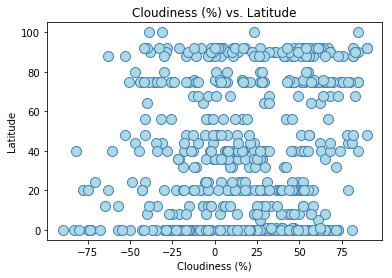

There is a significant correlation between Cloudiness (%) and latitude, r=0.16, n=607, p=0.0. Overall, there is a weak and positive correlation between the two variables. The higher the latitude, the higher the Cloudiness (%)


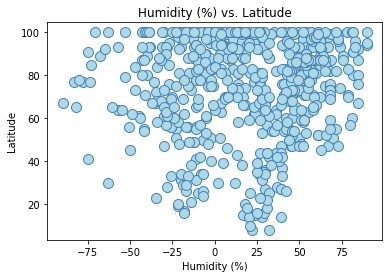

There is an insignificant correlation between Humidity (%) and latitude, r=0.06, n=607, p=0.14. Overall, there is a weak and positive correlation between the two variables. The higher the latitude, the higher the Humidity (%)


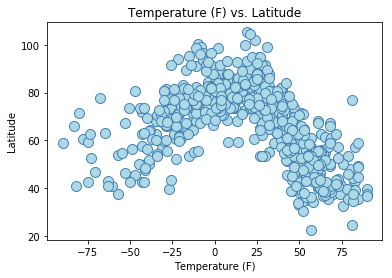

There is a significant correlation between Temperature (F) and latitude, r=-0.36, n=607, p=0.0. Overall, there is a weak and negative correlation between the two variables. The higher the latitude, the lower the Temperature (F)


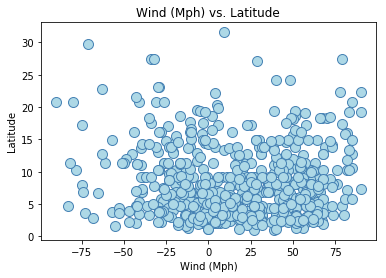

There is an insignificant correlation between Wind (mph) and latitude, r=-0.04, n=607, p=0.34. Overall, there is a weak and negative correlation between the two variables. The higher the latitude, the lower the Wind (mph)


In [60]:
for x in weatherDF2:
    if weatherDF2[x] is not weatherDF2['Latitude']:
        plt.scatter(weatherDF2.Latitude, weatherDF2[x], s=100, edgecolor='steelblue', c='lightblue')
        plt.title(f'%s vs. Latitude' % (x.title()))
        plt.ylabel("Latitude")
        plt.xlabel(x.title())
        PR=pearsonr(weatherDF.Latitude, weatherDF2[x])
        plt.show()
        def printanalysis(z,w):
            if w > 0.05:
                result="an insignificant"
            elif w < 0.05:
                result ="a significant"
            if z >= 0.5:
                description = "a strong and positive"
                direction = "higher"
            elif 0 < z < 0.5:
                description = "a weak and positive"
                direction = "higher"
            elif -0.5 < z < 0:
                description = "a weak and negative"
                direction = "lower"
            elif z <= 0.5:
                description = "a strong and negative"
                direction = "lower"
            else:
                description = "zero"
            print(f'There is %s correlation between %s and latitude, r=%s, n=%s, p=%s. Overall, there is %s correlation between the two variables. The higher the latitude, the %s the %s' % (result, x, round(PR[0],2), len(weatherDF), round(PR[1],2), description, direction, x))
        printanalysis(PR[0],PR[1])